# Exercise 4

Importing essencial libraries and creating the network:

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from numpy import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

G = nx.Graph()
G.add_edge('1','2')
G.add_edge('1','4')
G.add_edge('2','4')
G.add_edge('4','3')
G.add_edge('2','3')
G.add_edge('3','5')
G.add_edge('3','6')
G.add_edge('3','7')
G.add_edge('6','7')

Plotting the network:

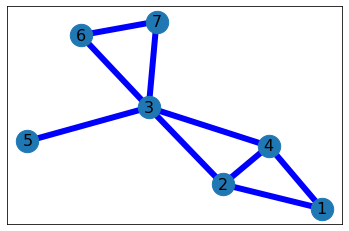

In [2]:
labels = G.nodes()
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, nodecolor='r', edge_color='b', 
        node_size=500, font_size=16, pos=pos, width=6) 
plt.show()

Defining the transition matrix (T) function:

In [3]:
def transitionMatrix(G):
    M = nx.to_numpy_matrix(G)
    A = np.sum(M, axis = 0) #axis = 1 => soma as linhas(rows)
    D = np.diagflat(A)
    D = np.linalg.inv(D)
    T = np.dot(D, M)
    return T

And the T raised to n (Tn) function:

In [4]:
def transitionMatrixPower(G, N):
    T = transitionMatrix(G)
    Tn = T
    for loop in range(N - 1):
        Tn = np.dot(T,Tn)
    return Tn

Plotting the transition matrix of the network:

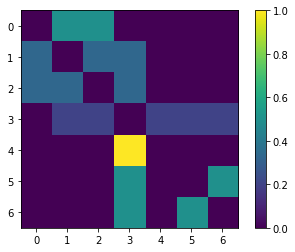

In [5]:
Tn = transitionMatrixPower(G,1)
plt.imshow(Tn)
plt.colorbar()
plt.show()

Let's see what happens with Tn as n grows:

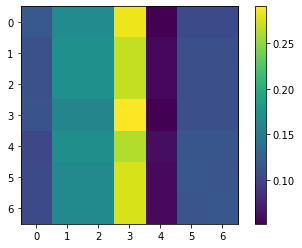

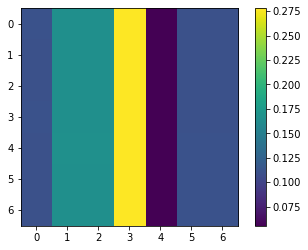

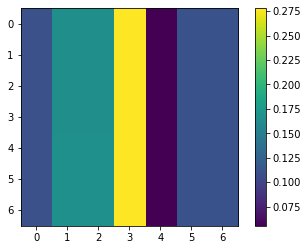

In [6]:
Tn = transitionMatrixPower(G,10)
plt.imshow(Tn)
plt.colorbar()
plt.show()

Tn = transitionMatrixPower(G,30)
plt.imshow(Tn)
plt.colorbar()
plt.show()

Tn = transitionMatrixPower(G,100)
plt.imshow(Tn)
plt.colorbar()
plt.show()

Now let's read the Les Miserables network and scatter plot the elements of its adjancency matrix (AM), with its AM³:

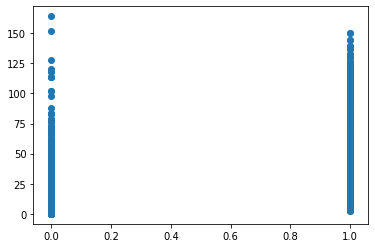

In [7]:
G = nx.read_gml("lesmis.gml")

M = nx.to_numpy_matrix(G)
Ad = np.dot(M,M)
Ad = np.dot(Ad,M)
Am = np.array(M, dtype='float')
At = np.array(Ad, dtype='float')
plt.scatter(Am, At)
plt.show()

Now let's calculate the Pearson Correlation coefficient for M and Tn for n =[0,200]

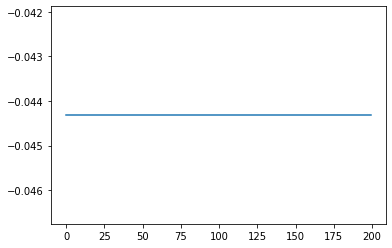

In [8]:
#calculando o coeficiente de pearson para valores de n
Am = np.array(M, dtype='float')
X = range(200)
Y = np.zeros(200)
for i in range(200):
    Tn = transitionMatrixPower(G,i)
    At = np.array(Tn, dtype='float')
    Y[i] = np.corrcoef(M, Tn)[0, 1]

plt.plot(X,Y)
plt.show()